# Break Through Tech - Allstate 1B
## Author: Tahia Islam
### Ridge Regression Model

Numerical features must be scaled because ridge works by penalizing large coefficients, so it's important to have all the features on the same scale.

Can be scaled by Pipeline

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


In [3]:
filepath = r"C:\Users\Tahia1\OneDrive\Documents\BreakThroughTech\allstate_1b_data\claims_data.csv"
df = pd.read_csv(filepath)

### Transform Target Variable

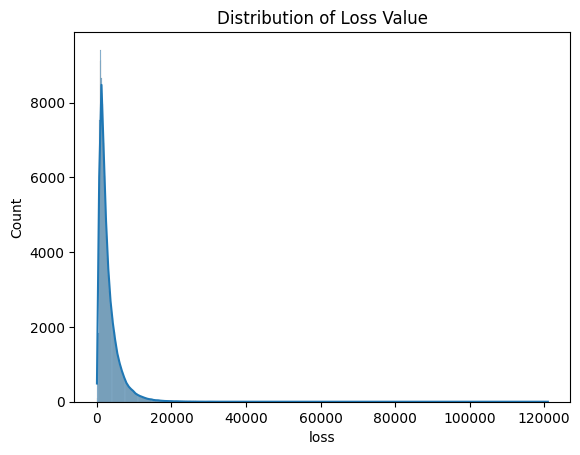

In [4]:
sns.histplot(df['loss'], kde = True)
plt.title("Distribution of Loss Value")
plt.show()

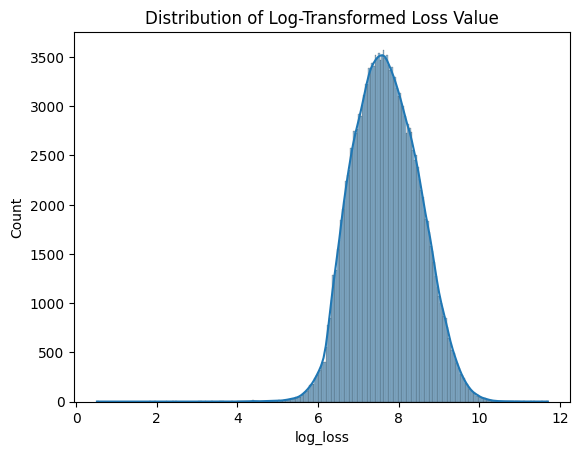

In [5]:
df['log_loss'] = np.log1p(df['loss'])
sns.histplot(df['log_loss'], kde='True')
plt.title('Distribution of Log-Transformed Loss Value')
plt.show()

### Ridge Regression

In [6]:
y = df['log_loss']

In [7]:
# define numerical and catgeorical features
categorical_cols = [c for c in df.columns if c.startswith("cat") and df[c].nunique() == 2]
numerical_cols = [c for c in df.columns if c.startswith("cont")]
X = df[numerical_cols + categorical_cols]

### Preprocessing Pipeline

We must scale numerical data

In [10]:
# create transformer for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# create transformer for categorical data
catgeorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# now combine using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', catgeorical_transformer, categorical_cols)
])

### Create Model Pipeline

This chainlinks the preprocessing and the Ridge Regression model.

In [11]:
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

In [14]:
# split data
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model
ridge_model.fit(X_train, y_train_log)

# make predictions
log_predictions = ridge_model.predict(X_test)

# ----Evaluate on the original scale-----
# convert both predictions and test target back to original 'loss' scale
original_predictions = np.expm1(log_predictions)
y_test_original = np.expm1(y_test_log)

mae = mean_absolute_error(y_test_original, original_predictions)
mae_log = mean_absolute_error(y_test_log, log_predictions)

print(f"Mean Absolute Error (on log scale): {mae_log:.4f}")
print(f"Mean Absolute Error (on original loss scale): ${mae:,.2f}")

Mean Absolute Error (on log scale): 0.4906
Mean Absolute Error (on original loss scale): $1,425.26


### Analysis
Mean Absolute Error (MAE) -  measures the average size of the errors in your predictions.

We have MAE on log scale and on original loss scale. 

We see that on average, the model's prediction of the loss is off by about $1,425.26

Is that too high or too low?

Next steps:
- add R-squared score
- Root Mean Squared Error (RMSE)
- Hyperparameter Tuning using GridSearchCV.
- Note down more analysis and why.